In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import scale
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
!pip install category_encoders
from category_encoders.cat_boost import CatBoostEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV
!pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import FeatureUnion
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from imblearn import pipeline
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
!pip install catboost
!pip install ipywidgets
from catboost import CatBoostClassifier
!pip install lightgbm
from lightgbm import LGBMClassifier as lgb
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SVMSMOTE, SMOTE, ADASYN, BorderlineSMOTE
from sklearn.pipeline import Pipeline
from google.colab import drive
drive.mount('/content/gdrive')

     |████████████████████████████████| 81kB 3.7MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 102kB 4.2MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


     |████████████████████████████████| 66.2MB 59kB/s 
Mounted at /content/gdrive


In [4]:
path = '/content/gdrive/My Drive/eel891-2020ple-trabalho-1/'

In [5]:
!ls '/content/gdrive/My Drive/eel891-2020ple-trabalho-1/'


conjunto_de_teste.csv	     exemplo_de_arquivo_de_respostas.csv
conjunto_de_treinamento.csv  Test_Data_CATB_encoded.csv
dicionario_de_dados.xlsx     Training_data_imputed_CATB_SMOTEENN_resampled.csv


# Load Data

In [21]:
df_treino = pd.read_csv(path+"conjunto_de_treinamento.csv")
df_teste = pd.read_csv(path+"conjunto_de_teste.csv")
#efetua o preprocessamento de uma vez num unico conjunto de dados
all_data = pd.concat([df_treino,df_teste],ignore_index=True)

In [22]:
df_treino.columns

Index(['id_solicitante', 'produto_solicitado', 'dia_vencimento',
       'forma_envio_solicitacao', 'tipo_endereco', 'sexo', 'idade',
       'estado_civil', 'qtde_dependentes', 'grau_instrucao', 'nacionalidade',
       'estado_onde_nasceu', 'estado_onde_reside',
       'possui_telefone_residencial', 'codigo_area_telefone_residencial',
       'tipo_residencia', 'meses_na_residencia', 'possui_telefone_celular',
       'possui_email', 'renda_mensal_regular', 'renda_extra',
       'possui_cartao_visa', 'possui_cartao_mastercard',
       'possui_cartao_diners', 'possui_cartao_amex', 'possui_outros_cartoes',
       'qtde_contas_bancarias', 'qtde_contas_bancarias_especiais',
       'valor_patrimonio_pessoal', 'possui_carro',
       'vinculo_formal_com_empresa', 'estado_onde_trabalha',
       'possui_telefone_trabalho', 'codigo_area_telefone_trabalho',
       'meses_no_trabalho', 'profissao', 'ocupacao', 'profissao_companheiro',
       'grau_instrucao_companheiro', 'local_onde_reside',
       '

In [23]:
#as colunas que tinham mais de 50% dos dados faltantes serão excluidas 'profissao_companheiro','grau_instrucao_companheiro',
all_data.drop(columns=['grau_instrucao','id_solicitante','possui_telefone_celular','qtde_contas_bancarias_especiais'],inplace=True)

In [24]:
#Get Numerical/categorical columns
mask = all_data.dtypes == np.object
categorical_cols = list(all_data.columns[mask])
numerical_cols = list(all_data.select_dtypes(include=['int64','float64']).columns)

In [25]:
numerical_cols

['produto_solicitado',
 'dia_vencimento',
 'tipo_endereco',
 'idade',
 'estado_civil',
 'qtde_dependentes',
 'nacionalidade',
 'tipo_residencia',
 'meses_na_residencia',
 'possui_email',
 'renda_mensal_regular',
 'renda_extra',
 'possui_cartao_visa',
 'possui_cartao_mastercard',
 'possui_cartao_diners',
 'possui_cartao_amex',
 'possui_outros_cartoes',
 'qtde_contas_bancarias',
 'valor_patrimonio_pessoal',
 'possui_carro',
 'meses_no_trabalho',
 'profissao',
 'ocupacao',
 'profissao_companheiro',
 'grau_instrucao_companheiro',
 'local_onde_reside',
 'local_onde_trabalha',
 'inadimplente']

In [26]:
columns_to_encode = ['dia_vencimento','produto_solicitado','tipo_endereco','estado_civil','nacionalidade','tipo_residencia','profissao',
 'ocupacao','local_onde_reside','local_onde_trabalha']
for el in columns_to_encode:
    numerical_cols.remove(el)
categorical_cols.extend(columns_to_encode)
numerical_cols

['idade',
 'qtde_dependentes',
 'meses_na_residencia',
 'possui_email',
 'renda_mensal_regular',
 'renda_extra',
 'possui_cartao_visa',
 'possui_cartao_mastercard',
 'possui_cartao_diners',
 'possui_cartao_amex',
 'possui_outros_cartoes',
 'qtde_contas_bancarias',
 'valor_patrimonio_pessoal',
 'possui_carro',
 'meses_no_trabalho',
 'profissao_companheiro',
 'grau_instrucao_companheiro',
 'inadimplente']

In [27]:
categorical_cols

['forma_envio_solicitacao',
 'sexo',
 'estado_onde_nasceu',
 'estado_onde_reside',
 'possui_telefone_residencial',
 'codigo_area_telefone_residencial',
 'vinculo_formal_com_empresa',
 'estado_onde_trabalha',
 'possui_telefone_trabalho',
 'codigo_area_telefone_trabalho',
 'dia_vencimento',
 'produto_solicitado',
 'tipo_endereco',
 'estado_civil',
 'nacionalidade',
 'tipo_residencia',
 'profissao',
 'ocupacao',
 'local_onde_reside',
 'local_onde_trabalha']

# Detect missing data

In [28]:
missingValues = all_data[categorical_cols].isna().sum()
#mask = data.value > 0
col = []
qnt = []
perc = []
total = all_data[categorical_cols].shape[0]
for items in missingValues.iteritems():
    #print(items)
    if items[1] > 0:
        #print(items)
        col.append(items[0])
        qnt.append(items[1])
        perc.append((items[1]/total)*100)

In [29]:
all_data['local_onde_reside'].max()

999.0

In [30]:
"""all_data['profissao'] = all_data['profissao'].fillna(1000).astype(np.int)
all_data['ocupacao'] = all_data['ocupacao'].fillna(1000).astype(np.int)
all_data['tipo_residencia'] = all_data['tipo_residencia'].fillna(1000).astype(np.int)
all_data['local_onde_reside'] = all_data['local_onde_reside'].fillna(1000).astype(np.int)
all_data['local_onde_trabalha'] = all_data['local_onde_trabalha'].fillna(1000).astype(np.int)"""

"all_data['profissao'] = all_data['profissao'].fillna(1000).astype(np.int)\nall_data['ocupacao'] = all_data['ocupacao'].fillna(1000).astype(np.int)\nall_data['tipo_residencia'] = all_data['tipo_residencia'].fillna(1000).astype(np.int)\nall_data['local_onde_reside'] = all_data['local_onde_reside'].fillna(1000).astype(np.int)\nall_data['local_onde_trabalha'] = all_data['local_onde_trabalha'].fillna(1000).astype(np.int)"

In [31]:
new_df = pd.DataFrame({"":col,"Missing Ratio":perc,"Missing Number":qnt})
new_df

,,Missing Ratio,Missing Number
0,tipo_residencia,2.698,1349
1,profissao,15.512,7756
2,ocupacao,14.626,7313
3,local_onde_reside,0.002,1
4,local_onde_trabalha,0.002,1


In [32]:
#Remove as colunas que tem mais de 50% de dados faltantes e transforma a variavel em ordinal
categorical_to_ordinal_encoding = {
                                    "dia_vencimento" : {1 : 0, 5 : 1, 10 : 2, 15 : 3, 20 : 4, 25:5}
                                  }
ordinal_cols = 'dia_vencimento'
#all_data.drop(columns=['id_solicitante','profissao_companheiro','grau_instrucao_companheiro'],inplace=True)

In [33]:
categorical_cols.append('profissao_companheiro')
categorical_cols.append('grau_instrucao_companheiro')
numerical_cols.remove('grau_instrucao_companheiro')
numerical_cols.remove('profissao_companheiro')


In [34]:
'dia_vencimento' in categorical_cols

True

In [35]:
input_cols = categorical_cols + numerical_cols
len(input_cols) == len(all_data.columns) 

True

In [36]:
input_cols.remove('inadimplente')
output_col = 'inadimplente'

# Check skewness

In [37]:
data_to_normalize = ['idade','qtde_dependentes','meses_na_residencia','renda_mensal_regular','renda_extra',
                     'qtde_contas_bancarias','valor_patrimonio_pessoal','meses_no_trabalho']
skewed_feats = all_data[data_to_normalize].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness

,Skewed Features
renda_extra,207.265132
valor_patrimonio_pessoal,103.668227
renda_mensal_regular,85.703177
meses_no_trabalho,62.397769
qtde_dependentes,4.077634
meses_na_residencia,1.903609
qtde_contas_bancarias,0.600715
idade,0.473131


# Normalize

In [38]:
scaler = MinMaxScaler()
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features".format(skewness.shape[0]))
skewed_features = skewness.index
for feat in skewed_features:
    if any(x<=0 for x in all_data[feat]):
        for i in all_data.index:
            all_data.loc[i,feat] += (1 + np.abs(all_data[feat].min()))
all_data[skewed_features] = np.log(all_data[skewed_features])
all_data[data_to_normalize] = scaler.fit_transform(all_data[data_to_normalize])


There are 8 skewed numerical features


In [39]:
all_data.describe()

,produto_solicitado,dia_vencimento,tipo_endereco,idade,estado_civil,qtde_dependentes,nacionalidade,tipo_residencia,meses_na_residencia,possui_email,renda_mensal_regular,renda_extra,possui_cartao_visa,possui_cartao_mastercard,possui_cartao_diners,possui_cartao_amex,possui_outros_cartoes,qtde_contas_bancarias,valor_patrimonio_pessoal,possui_carro,meses_no_trabalho,profissao,ocupacao,profissao_companheiro,grau_instrucao_companheiro,local_onde_reside,local_onde_trabalha,inadimplente
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,48651.000000,46223.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,42244.000000,42687.000000,21116.000000,17662.000000,49999.000000,49999.000000,40000.000000
mean,1.275700,12.869920,1.006540,0.666267,2.14840,0.084267,0.961600,1.252225,0.341639,0.802280,0.233900,0.027388,0.111440,0.097460,0.001320,0.001740,0.002040,0.225699,0.03111,0.336140,0.000672,8.061784,2.484316,3.797926,0.296003,585.165803,585.165803,0.260125
std,0.988286,6.608385,0.080606,0.124490,1.32285,0.130788,0.202105,0.867833,0.199259,0.398284,0.064003,0.114159,0.314679,0.296586,0.036308,0.041677,0.045121,0.302598,0.14016,0.472392,0.019290,3.220104,1.532261,5.212168,0.955688,227.775154,227.775154,0.438708
min,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000,105.000000,0.000000
25%,1.000000,10.000000,1.000000,0.571870,1.00000,0.000000,1.000000,1.000000,0.127564,1.000000,0.185112,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,450.000000,450.000000,0.000000
50%,1.000000,10.000000,1.000000,0.669229,2.00000,0.000000,1.000000,1.000000,0.358117,1.000000,0.219051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,9.000000,2.000000,0.000000,0.000000,600.000000,600.000000,0.000000
75%,1.000000,15.000000,1.000000,0.758627,2.00000,0.173765,1.000000,1.000000,0.510256,1.000000,0.267609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.630930,0.00000,1.000000,0.000000,9.000000,4.000000,11.000000,0.000000,737.000000,737.000000,1.000000
max,7.000000,25.000000,2.000000,1.000000,7.00000,1.000000,2.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,18.000000,5.000000,17.000000,5.000000,999.000000,999.000000,1.000000


# FILL NAN

In [40]:
all_data['sexo'].fillna('N')
all_data['sexo'].isna().sum()

0

In [41]:
all_data.replace("XX",np.nan,inplace=True)

# Define Metrics for model evaluation

In [26]:
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
          'roc_auc':  make_scorer(roc_auc_score),
          'tp' : make_scorer(tp), 'tn' : make_scorer(tn),
           'fp' : make_scorer(fp), 'fn' : make_scorer(fn)}

In [27]:
resultado_metricas = {"treino":pd.DataFrame({"Name":['acuracia','precisão','recall','f1_score','roc_auc','tp','tn','fp','fn']})} #'tp','tn','fp','fn'
scores_geral = {}
def armazena_resultado(nome_modelo,scores):
    media = {'acuracia':np.mean(scores['test_accuracy']),'precisão':np.mean(scores['test_precision'])
             ,'recall':np.mean(scores['test_recall']),'f1_score':np.mean(scores['test_f1_score'])
             ,'roc_auc':np.mean(scores['test_roc_auc']),
            'tp':np.sum(scores['test_tp']),'tn':np.sum(scores['test_tn']),'fp':np.sum(scores['test_fp']),'fn':np.sum(scores['test_fn'])}
    var = {'acuracia':np.var(scores['test_accuracy']),'precisão':np.var(scores['test_precision'])
             ,'recall':np.var(scores['test_recall']),'f1_score':np.var(scores['test_f1_score'])
             ,'roc_auc':np.var(scores['test_roc_auc']),
                              'tp':-1,'tn':-1,'fp':-1,'fn':-1}
    resultado_metricas["treino"][nome_modelo] = [ v for v in media.values() ]
    resultado_metricas["treino"][nome_modelo+" Var"] = [ v for v in var.values() ]
    return media,var

# Catboost/Leave-one-out and Fill Missing Data with KNN imputer

In [44]:
float_to_str_cols = ['profissao','ocupacao','local_onde_reside',
                'local_onde_trabalha','profissao_companheiro',
                'grau_instrucao_companheiro','tipo_residencia',
                'dia_vencimento','produto_solicitado',
                'tipo_endereco','estado_civil','nacionalidade']

In [45]:
for col in float_to_str_cols:
  if col not in categorical_cols:
    numerical_cols.remove(col)
    categorical_cols.append(col)

In [46]:

class float_to_str(BaseEstimator,TransformerMixin):
  def __init__(self,cols_to_transform):
    self.cols = cols_to_transform
    self.map = {}
  def fit(self,X,y):
    for column in self.cols:
      self.map[column] = [X[column].max() + 1]
    return self
  def transform(self,X):
    x_transformed = X.copy(deep=True)
    for column in self.cols:
      if (x_transformed[column].isnull().values.any()):
        print("Replacing nan in {} for {}".format(column,self.map[column][0]))
        x_transformed[column].fillna(self.map[column][0],inplace=True)
    x_transformed[self.cols] = x_transformed[self.cols].astype("int64")
    #x_transformed[self.cols] = x_transformed[self.cols].astype(str)
    return x_transformed

In [47]:
t = float_to_str(float_to_str_cols)
t.fit(all_data[input_cols].iloc[:40000],all_data[output_col].iloc[:40000])
t.map

{'dia_vencimento': [26],
 'estado_civil': [8],
 'grau_instrucao_companheiro': [6.0],
 'local_onde_reside': [1000.0],
 'local_onde_trabalha': [1000.0],
 'nacionalidade': [3],
 'ocupacao': [6.0],
 'produto_solicitado': [8],
 'profissao': [18.0],
 'profissao_companheiro': [18.0],
 'tipo_endereco': [3],
 'tipo_residencia': [6.0]}

In [48]:
#np.count_nonzero(all_data[input_cols].isna())
x_t = t.transform(all_data.iloc[:40000])
x_teste = t.transform(all_data.iloc[40000:])
np.count_nonzero(x_t.isna())

Replacing nan in profissao for 18.0
Replacing nan in ocupacao for 6.0
Replacing nan in local_onde_reside for 1000.0
Replacing nan in local_onde_trabalha for 1000.0
Replacing nan in profissao_companheiro for 18.0
Replacing nan in grau_instrucao_companheiro for 6.0
Replacing nan in tipo_residencia for 6.0
Replacing nan in profissao for 18.0
Replacing nan in ocupacao for 6.0
Replacing nan in profissao_companheiro for 18.0
Replacing nan in grau_instrucao_companheiro for 6.0
Replacing nan in tipo_residencia for 6.0


3003

In [49]:
x_t[float_to_str_cols].dtypes

profissao                     int64
ocupacao                      int64
local_onde_reside             int64
local_onde_trabalha           int64
profissao_companheiro         int64
grau_instrucao_companheiro    int64
tipo_residencia               int64
dia_vencimento                int64
produto_solicitado            int64
tipo_endereco                 int64
estado_civil                  int64
nacionalidade                 int64
dtype: object

In [ ]:
class LOO_ENC(BaseEstimator,TransformerMixin):
  def __init__(self,map=t.map,sigma=None,categorical_cols=categorical_cols,handle_missing=False):
    self.sigma = sigma
    self.handle_missing = handle_missing
    self.reverse_map = {}
    self.map = map
    self.cols = categorical_cols
    self.enc = None
    
  def fit(self,X,y):
    c = LeaveOneOutEncoder(
                          sigma=self.sigma,
                          cols=self.cols
                          )
    self.enc = c.fit(X,y)
    a = pd.DataFrame.from_dict(self.map)
    a = a.astype("int64")
    b = pd.DataFrame.from_dict(X.iloc[0:2].to_dict())
    for col in list(self.map.keys()):
      if col in list(b.columns):
        b[col].iloc[0] = a[col].iloc[0]
    transformed = self.enc.transform(b)
    for key in list(self.map.keys()):
      self.reverse_map[key] = (a[key].iloc[0],transformed[key].iloc[0])
    return self
  def transform(self,X):
    t = self.enc.transform(X)
    t = t.astype("float64")
    #print("Handle missing {}\n".format(self.handle_missing)
    if not (self.handle_missing):
      for col in list(self.map.keys()):
        if (self.reverse_map[col][1] in t[col].values):
          #print("\nReplacing {} in column {}\n".format(self.reverse_map[col][1],col))
          t[col].replace(to_replace=self.reverse_map[col][1],value= np.nan,inplace=True)
        #else:
          #print("\n {} not found in column {}\n".format(self.reverse_map[col][1],col))
          #print("============================== unique values of {}=============\n".format(col))
          #print(np.unique(t[col]))
          #print("================================================================\n")
    #print(t.columns[t.isna().any()].tolist())
    return t


In [50]:
class CATB_ENC(BaseEstimator,TransformerMixin):
  def __init__(self,map=t.map,a=1,sigma=None,categorical_cols=categorical_cols,handle_missing=False):
    self.a = a
    self.sigma = sigma
    self.handle_missing = handle_missing
    self.reverse_map = {}
    self.map = map
    self.cols = categorical_cols
    self.enc = None
    
  def fit(self,X,y):
    c = CatBoostEncoder(
                        sigma=self.sigma,
                        cols=self.cols
                        )
    self.enc = c.fit(X,y)
    a = pd.DataFrame.from_dict(self.map)
    a = a.astype("int64")
    b = pd.DataFrame.from_dict(X.iloc[0:2].to_dict())
    for col in list(self.map.keys()):
      if col in list(b.columns):
        b[col].iloc[0] = a[col].iloc[0]
    transformed = self.enc.transform(b)
    for key in list(self.map.keys()):
      self.reverse_map[key] = (a[key].iloc[0],transformed[key].iloc[0])
    
    return self
  def transform(self,X):
    t = self.enc.transform(X)
    t = t.astype("float64")
    #print("Handle missing {}\n".format(self.handle_missing))
    if not (self.handle_missing):
      for col in list(self.map.keys()):
        if (self.reverse_map[col][1] in t[col].values):
          #print("\nReplacing {} in column {}\n".format(self.reverse_map[col][1],col))
          t[col].replace(to_replace=self.reverse_map[col][1],value= np.nan,inplace=True)
        #else:
          #print("\n {} not found in column {}\n".format(self.reverse_map[col][1],col))
          #print("============================== unique values of {}=============\n".format(col))
          #print(np.unique(t[col]))
          #print("================================================================\n")
    #print(t.columns[t.isna().any()].tolist())
    return t


In [ ]:
x_t[float_to_str_cols]

,profissao,ocupacao,local_onde_reside,local_onde_trabalha,profissao_companheiro,grau_instrucao_companheiro,tipo_residencia,dia_vencimento,produto_solicitado,tipo_endereco,estado_civil,nacionalidade
0,9,4,718,718,18,6,5,10,1,1,1,1
1,9,2,628,628,0,0,1,5,1,1,2,1
2,9,2,456,456,11,6,1,15,1,1,2,1
3,13,5,563,563,0,0,1,5,1,1,1,1
4,18,1,484,484,18,6,1,10,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,9,2,960,960,18,6,1,10,1,1,1,1
39996,18,6,867,867,18,6,1,10,1,1,1,1
39997,9,2,681,681,11,0,2,5,1,1,2,0
39998,9,5,230,230,18,6,1,20,1,1,1,1


In [ ]:
c = CATB_ENC(sigma=0.9,handle_missing=False)
c.fit(x_t[input_cols],x_t[output_col])
x_s = c.transform(x_t[input_cols])

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
c.reverse_map

{'dia_vencimento': (26, 0.260125),
 'estado_civil': (8, 0.260125),
 'grau_instrucao_companheiro': (6, 0.2581369148853929),
 'local_onde_reside': (1000, 0.260125),
 'local_onde_trabalha': (1000, 0.260125),
 'nacionalidade': (3, 0.260125),
 'ocupacao': (6, 0.27023194938208905),
 'produto_solicitado': (8, 0.260125),
 'profissao': (18, 0.26440227272727274),
 'profissao_companheiro': (18, 0.26084318594987665),
 'tipo_endereco': (3, 0.260125),
 'tipo_residencia': (6, 0.2509241765782251)}

In [ ]:
c.enc

CatBoostEncoder(a=1,
                cols=['forma_envio_solicitacao', 'sexo', 'estado_onde_nasceu',
                      'estado_onde_reside', 'possui_telefone_residencial',
                      'codigo_area_telefone_residencial',
                      'vinculo_formal_com_empresa', 'estado_onde_trabalha',
                      'possui_telefone_trabalho',
                      'codigo_area_telefone_trabalho', 'dia_vencimento',
                      'produto_solicitado', 'tipo_endereco', 'estado_civil',
                      'nacionalidade', 'tipo_residencia', 'profissao',
                      'ocupacao', 'local_onde_reside', 'local_onde_trabalha',
                      'profissao_companheiro', 'grau_instrucao_companheiro'],
                drop_invariant=False, handle_missing='value',
                handle_unknown='value', random_state=None, return_df=True,
                sigma=0.9, verbose=0)

In [ ]:
x_s.isnull().sum()

forma_envio_solicitacao                 0
sexo                                    0
estado_onde_nasceu                      0
estado_onde_reside                      0
possui_telefone_residencial             0
codigo_area_telefone_residencial        0
vinculo_formal_com_empresa              0
estado_onde_trabalha                    0
possui_telefone_trabalho                0
codigo_area_telefone_trabalho           0
dia_vencimento                          0
produto_solicitado                      0
tipo_endereco                           0
estado_civil                            0
nacionalidade                           0
tipo_residencia                      1092
profissao                            6214
ocupacao                             5906
local_onde_reside                      64
local_onde_trabalha                    64
profissao_companheiro               23102
grau_instrucao_companheiro          25870
idade                                   0
qtde_dependentes                  

In [ ]:
x_s.columns[x_s.isnull().any()].tolist()

['tipo_residencia',
 'profissao',
 'ocupacao',
 'local_onde_reside',
 'local_onde_trabalha',
 'profissao_companheiro',
 'grau_instrucao_companheiro',
 'meses_na_residencia']

In [ ]:
flag = 0
for x in float_to_str_cols:
  if x in categorical_cols:
    print(x)
    flag += 1
len(float_to_str_cols)

profissao
ocupacao
local_onde_reside
local_onde_trabalha
profissao_companheiro
grau_instrucao_companheiro
tipo_residencia
dia_vencimento
produto_solicitado
tipo_endereco
estado_civil
nacionalidade


12

In [ ]:
x_s.describe()
#'grau_instrucao_companheiro' in categorical_cols


,forma_envio_solicitacao,sexo,estado_onde_nasceu,estado_onde_reside,possui_telefone_residencial,codigo_area_telefone_residencial,vinculo_formal_com_empresa,estado_onde_trabalha,possui_telefone_trabalho,codigo_area_telefone_trabalho,dia_vencimento,produto_solicitado,tipo_endereco,estado_civil,nacionalidade,tipo_residencia,profissao,ocupacao,local_onde_reside,local_onde_trabalha,profissao_companheiro,grau_instrucao_companheiro,idade,qtde_dependentes,meses_na_residencia,possui_email,renda_mensal_regular,renda_extra,possui_cartao_visa,possui_cartao_mastercard,possui_cartao_diners,possui_cartao_amex,possui_outros_cartoes,qtde_contas_bancarias,valor_patrimonio_pessoal,possui_carro,meses_no_trabalho
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,38908.000000,33786.000000,34094.000000,39936.000000,39936.000000,16898.000000,14130.000000,40000.000000,40000.000000,36997.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,0.260126,0.260120,0.260120,0.260123,0.260124,0.260300,0.260125,0.260109,0.260125,0.260202,0.260123,0.260123,0.260125,0.260127,0.260125,0.260383,0.259342,0.258374,0.259871,0.259871,0.259067,0.263792,0.666431,0.084657,0.341860,0.802275,0.233835,0.027273,0.111400,0.097925,0.001425,0.001900,0.002125,0.225476,0.031071,0.335925,0.000678
std,0.008786,0.010591,0.020440,0.022597,0.029510,0.047838,0.001773,0.020246,0.005881,0.029909,0.036506,0.010907,0.001591,0.031613,0.000513,0.014823,0.019376,0.030578,0.079552,0.079552,0.021412,0.016800,0.124540,0.131132,0.199611,0.398289,0.064110,0.113822,0.314631,0.297217,0.037723,0.043548,0.046049,0.302514,0.139989,0.472319,0.019115
min,0.224203,0.252067,0.196192,0.180262,0.247023,0.071955,0.258551,0.159316,0.256549,0.023648,0.231550,0.257789,0.240675,0.211836,0.258525,0.187060,0.026013,0.199720,0.013006,0.013006,0.037161,0.083708,0.000000,0.000000,0.000000,0.000000,0.014439,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.258713,0.252067,0.238901,0.248987,0.247023,0.236337,0.258551,0.252746,0.256549,0.256537,0.231632,0.257789,0.260256,0.241666,0.260174,0.254917,0.262865,0.259846,0.210405,0.210405,0.241919,0.268548,0.582926,0.000000,0.127564,1.000000,0.185112,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.258713,0.252067,0.264495,0.259249,0.247023,0.257906,0.258551,0.252746,0.256549,0.256537,0.231632,0.257789,0.260256,0.241666,0.260174,0.254917,0.262865,0.271592,0.257819,0.257819,0.271824,0.268548,0.669229,0.000000,0.358117,1.000000,0.219051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.266495,0.272851,0.272388,0.277014,0.247023,0.297841,0.262122,0.258407,0.269796,0.256537,0.271998,0.257789,0.260256,0.303027,0.260174,0.254917,0.262865,0.271592,0.301079,0.301079,0.271824,0.268548,0.758627,0.173765,0.510256,1.000000,0.267609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.630930,0.000000,1.000000,0.000000
max,0.266495,0.404625,0.313530,0.352786,0.326592,0.420042,0.262122,0.447152,0.269796,0.753375,0.333022,0.327028,0.260256,0.303027,0.269116,0.301867,0.473347,0.288629,0.815031,0.815031,0.410405,0.268548,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.975719


In [ ]:
np.count_nonzero(x_s[float_to_str_cols].isna())

0

In [ ]:
x_s

,forma_envio_solicitacao,sexo,estado_onde_nasceu,estado_onde_reside,possui_telefone_residencial,codigo_area_telefone_residencial,vinculo_formal_com_empresa,estado_onde_trabalha,possui_telefone_trabalho,codigo_area_telefone_trabalho,dia_vencimento,produto_solicitado,tipo_endereco,estado_civil,nacionalidade,tipo_residencia,profissao,ocupacao,local_onde_reside,local_onde_trabalha,profissao_companheiro,grau_instrucao_companheiro,idade,qtde_dependentes,meses_na_residencia,possui_email,renda_mensal_regular,renda_extra,possui_cartao_visa,possui_cartao_mastercard,possui_cartao_diners,possui_cartao_amex,possui_outros_cartoes,qtde_contas_bancarias,valor_patrimonio_pessoal,possui_carro,meses_no_trabalho
0,0.258713,0.272851,0.272552,0.297230,0.247023,0.304453,0.258551,0.252746,0.256549,0.256537,0.231632,0.257789,0.260256,0.303027,0.260174,0.287049,0.262865,0.288629,0.290405,0.290405,0.260843,0.258137,0.685815,0.449177,0.329748,1.0,0.290663,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0
1,0.266495,0.272851,0.263626,0.265704,0.247023,0.258353,0.262122,0.271767,0.269796,0.283685,0.231550,0.257789,0.260256,0.241666,0.260174,0.254917,0.262865,0.271592,0.216594,0.216594,0.271824,0.268548,0.783963,0.000000,0.329748,0.0,0.186538,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,1.0,0.0
2,0.224203,0.272851,0.313530,0.277014,0.247023,0.236337,0.262122,0.298243,0.269796,0.293765,0.271998,0.257789,0.260256,0.241666,0.260174,0.254917,0.262865,0.271592,0.253661,0.253661,0.241919,0.258137,0.738336,0.275412,0.127564,1.0,0.299186,0.0,0.0,0.0,0.0,0.0,0.0,0.63093,0.000000,0.0,0.0
3,0.266495,0.272851,0.267893,0.278631,0.247023,0.216301,0.262122,0.252746,0.269796,0.229016,0.231550,0.257789,0.260256,0.303027,0.260174,0.254917,0.183499,0.268497,0.268696,0.268696,0.271824,0.268548,0.510620,0.000000,0.560301,0.0,0.195998,0.0,0.0,0.0,0.0,0.0,0.0,0.63093,0.000000,1.0,0.0
4,0.258713,0.252067,0.269987,0.277014,0.326592,0.326505,0.258551,0.252746,0.256549,0.256537,0.231632,0.257789,0.260256,0.241666,0.260174,0.254917,0.264402,0.199720,0.206462,0.206462,0.260843,0.258137,0.946867,0.000000,0.202184,1.0,0.182202,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.616115,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.258713,0.272851,0.228457,0.225128,0.247023,0.162714,0.262122,0.251821,0.269796,0.186719,0.231632,0.257789,0.260256,0.303027,0.260174,0.254917,0.262865,0.271592,0.156551,0.156551,0.260843,0.258137,0.651814,0.173765,0.674227,1.0,0.232407,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0
39996,0.258713,0.272851,0.272388,0.236500,0.326592,0.326505,0.258551,0.252746,0.256549,0.256537,0.231632,0.257789,0.260256,0.303027,0.260174,0.254917,0.264402,0.270232,0.117099,0.117099,0.260843,0.258137,0.818815,0.000000,0.202184,1.0,0.203757,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0
39997,0.266495,0.272851,0.255619,0.253867,0.247023,0.180296,0.262122,0.252746,0.269796,0.229448,0.231550,0.257789,0.260256,0.241666,0.258525,0.301867,0.262865,0.271592,0.165815,0.165815,0.241919,0.268548,0.623941,0.173765,0.000000,1.0,0.358164,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,1.0,0.0
39998,0.258713,0.272851,0.268186,0.266310,0.247023,0.255906,0.258551,0.252746,0.256549,0.256537,0.294560,0.257789,0.260256,0.303027,0.260174,0.254917,0.262865,0.268497,0.241783,0.241783,0.260843,0.258137,0.751993,0.000000,0.329748,1.0,0.208853,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0


In [ ]:
output_col in input_cols

False

In [ ]:
encoder = CATB_ENC()
imputer = KNNImputer()
model = RandomForestClassifier()

pipe = Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('model',model)
])

catboost_search = {
    'encoder__a': Real(0,300,'uniform'),
    'encoder__sigma':Real(0,1,'uniform'),
    'encoder__handle_missing':Categorical([True,False]),
    'imputer__n_neighbors':Integer(3,7)
}

opt = BayesSearchCV(
    estimator=pipe,
    # (parameter space, # of evaluations)
    search_spaces=catboost_search,
    n_iter = 50,
    scoring=make_scorer(f1_score),
    cv=5
)

opt.fit(x_t[input_cols].iloc[:40000],x_t[output_col].iloc[:40000])

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retriev

BayesSearchCV(cv=5, error_score='raise',
              estimator=Pipeline(memory=None,
                                 steps=[('encoder',
                                         CATB_ENC(a=1, categorical_cols=None,
                                                  handle_missing=False,
                                                  map={'dia_vencimento': [26],
                                                       'estado_civil': [8],
                                                       'grau_instrucao_companheiro': [6.0],
                                                       'local_onde_reside': [1000.0],
                                                       'local_onde_trabalha': [1000.0],
                                                       'nacionalidade': [3],
                                                       'ocupacao': [6.0],
                                                       'produto_solicitado': [8],
                                                       'p

In [ ]:
print("val. score: %s" % opt.best_score_)
#print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))

val. score: 0.10366743353626401
best params: OrderedDict([('encoder__a', 266.5329266984254), ('encoder__handle_missing', True), ('encoder__sigma', 0.9929629546750682), ('imputer__n_neighbors', 7)])


In [ ]:
encoder = LOO_ENC()
imputer = KNNImputer()
model = RandomForestClassifier()

pipe = Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('model',model)
])

loo_search = {
    'encoder__sigma':Real(0,1,'uniform'),
    'encoder__handle_missing':Categorical([True,False]),
    'imputer__n_neighbors':Integer(3,7)
}

opt = BayesSearchCV(
    pipe,
    [(loo_search, 50)],
    scoring=make_scorer(f1_score),
    cv=5
)

opt.fit(x_t[input_cols].iloc[:40000],x_t[output_col].iloc[:40000])

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retriev

BayesSearchCV(cv=5, error_score='raise',
              estimator=Pipeline(memory=None,
                                 steps=[('encoder',
                                         LOO_ENC(categorical_cols=None,
                                                 handle_missing=False,
                                                 map={'dia_vencimento': [26],
                                                      'estado_civil': [8],
                                                      'grau_instrucao_companheiro': [6.0],
                                                      'local_onde_reside': [1000.0],
                                                      'local_onde_trabalha': [1000.0],
                                                      'nacionalidade': [3],
                                                      'ocupacao': [6.0],
                                                      'produto_solicitado': [8],
                                                      'profiss...
      

In [ ]:
print("val. score: %s" % opt.best_score_)
#print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))

val. score: 0.10145600392949058
best params: OrderedDict([('encoder__handle_missing', True), ('encoder__sigma', 0.9998531659729949), ('imputer__n_neighbors', 3)])


# Dataset balancing 

In [ ]:
encoder = CATB_ENC(a=266.5329266984254,sigma=0.9929629546750682,handle_missing=True)
imputer = KNNImputer(n_neighbors=7)
balancer = SMOTE()
model = RandomForestClassifier()
pipe = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('model',model)
])


balancer_search = {'balancer': [
                                SVMSMOTE(random_state=42),
                                BorderlineSMOTE(kind='borderline-1',random_state=42),
                                BorderlineSMOTE(kind='borderline-2',random_state=42),
                                SMOTEENN(random_state=42),
                                SMOTETomek(random_state=42),
                                ADASYN(random_state=42),
                                None
                                ]}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=19)
clf = GridSearchCV(pipe,balancer_search,scoring=make_scorer(f1_score),n_jobs=-1, cv=cv,return_train_score=False)
clf.fit(x_t[input_cols].iloc[:40000],x_t[output_col].iloc[:40000])
print(clf.score(x_t[input_cols].iloc[:40000],x_t[output_col].iloc[:40000]))
print(clf.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.

0.5861271054189313
{'balancer': SMOTEENN(enn=None, random_state=42, ratio=None, sampling_strategy='auto',
         smote=None)}


In [ ]:
def impute(X_treino,X_teste,Y_treino,Y_teste):
  imputer = KNNImputer(n_neighbors=7)
  X_treino[input_cols] = imputer.fit_transform(X_treino)
  X_teste[input_cols] = imputer.transform(X_teste)
  X_treino[output_col] = Y_treino
  #X_treino.to_csv('Training_data_imputed_LOO.csv')
  X_teste[output_col] = Y_teste
  #X_teste.to_csv('Test_data_imputed_LOO.csv')
  return X_treino,X_teste

In [ ]:
encoder = CATB_ENC(a=266.5329266984254,sigma=0.9929629546750682,handle_missing=True)
X_treino = encoder.fit_transform(x_t[input_cols],
                                  x_t[output_col])
X_teste = encoder.transform(x_teste[input_cols])
Y_treino = x_t[output_col].iloc[:40000]
Y_teste = x_teste[output_col].iloc[40000:]
X_treino, X_teste = impute(X_treino,X_teste,Y_treino,Y_teste)
smt = SMOTEENN(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_treino[input_cols],X_treino[output_col])

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and w

In [ ]:
df_resampled = pd.DataFrame.from_records(X_resampled,columns=input_cols)

In [ ]:
df_resampled[output_col] = y_resampled

In [11]:
df_resampled.to_csv("Training_data_imputed_CATB_SMOTEENN_resampled.csv")

NameError: ignored

In [12]:
X_teste.to_csv("Test_Data_CATB_encoded.csv")

NameError: ignored

In [6]:
df_resampled = pd.read_csv(path+"Training_data_imputed_CATB_SMOTEENN_resampled.csv",index_col='Unnamed: 0')

In [7]:
X_teste =  pd.read_csv(path+"Test_Data_CATB_encoded.csv",index_col='Unnamed: 0')

In [8]:
input_cols = list(df_resampled.columns)
input_cols.remove('inadimplente')
output_col = 'inadimplente'

# Feature Selection


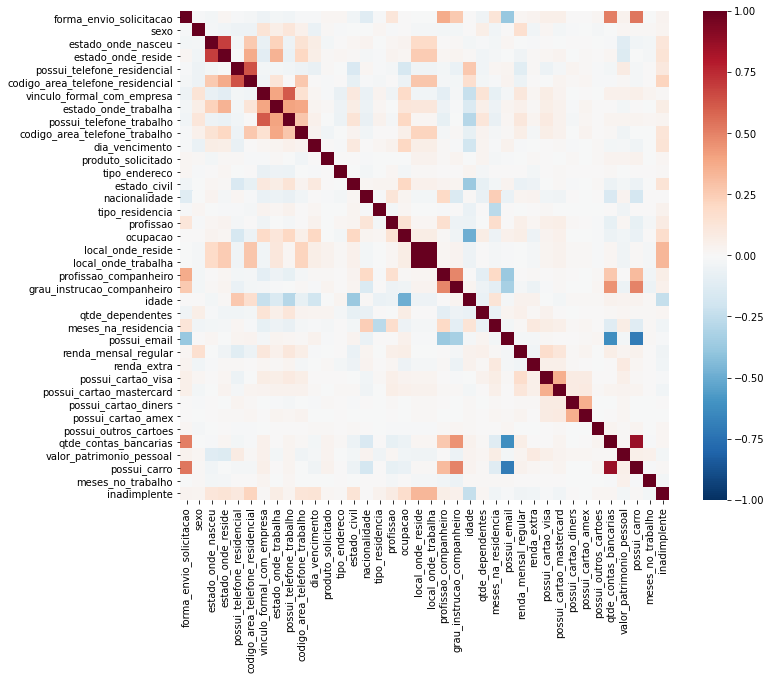

In [8]:
corrmat = df_resampled.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,cmap=sns.color_palette("RdBu_r", 1000), vmin=-1,vmax=1, square=True)
plt.savefig('CorrelationMatrix.png')

In [9]:
pca = PCA(n_components=0.9, svd_solver = 'full')
pca.fit(scale(df_resampled[input_cols]))
X_PCA_train = pca.transform(scale(df_resampled[input_cols]))

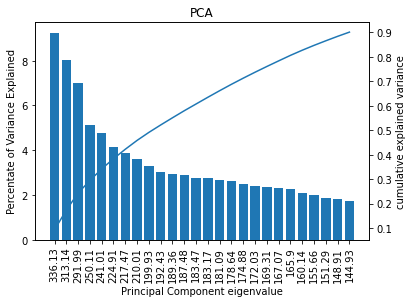

In [10]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
result = pca.explained_variance_ratio_
plt.bar(x= sorted(np.arange(len(result)),reverse=True), height=sorted(percent_variance,reverse=True),tick_label=np.round(sorted(pca.singular_values_,reverse=True),decimals=2) )
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component eigenvalue')
plt.xticks(rotation=90)
plt.title('PCA')
ax = plt.gca()
# set the xlimits to be the reverse of the current xlimits
ax.set_xlim(ax.get_xlim()[::-1])
# call `draw` to re-render the graph
plt.draw()

axes2 = plt.twinx()
axes2.plot(np.arange(len(result)),sorted(np.cumsum(result),reverse=True ))
axes2.set_ylabel('cumulative explained variance')
plt.savefig('PCA.png')
plt.show()

In [50]:
kpca = Pipeline([
                  ("Nys",Nystroem(gamma=0.1, random_state=42, n_components=100)),
                  ("Nys_pca",PCA(n_components=0.9))                 
])
union = FeatureUnion([("pca", PCA(n_components=0.9)),
                      ("lda", LinearDiscriminantAnalysis()),
                      ("K_best",SelectKBest(chi2,k=20)),
                      ("KPca",kpca)
                      ])

In [ ]:
model = RandomForestClassifier()
pipe = Pipeline(steps=[
    ('union',union),
    ('model',model)
])

union_search = {
   'union__K_best__k':Integer(10,20),
   'union__KPca__Nys__n_components':Integer(400,1000),
   'union__KPca__Nys__gamma': Real(0.001,1000,prior='log-uniform')
}

opt = BayesSearchCV(
    pipe,
    [(union_search, 50)],
    scoring=make_scorer(f1_score),
    cv=5
)

opt.fit(df_resampled[input_cols],df_resampled[output_col])

/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BayesSearchCV(cv=5, error_score='raise',
              estimator=Pipeline(memory=None,
                                 steps=[('union',
                                         FeatureUnion(n_jobs=None,
                                                      transformer_list=[('pca',
                                                                         PCA(copy=True,
                                                                             iterated_power='auto',
                                                                             n_components=0.9,
                                                                             random_state=None,
                                                                             svd_solver='auto',
                                                                             tol=0.0,
                                                                             whiten=False)),
                                                              

In [ ]:
print("val. score: %s" % opt.best_score_)
#print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))

val. score: 0.9285848473679367
best params: OrderedDict([('union__KPca__Nys__gamma', 5.467108486901664), ('union__KPca__Nys__n_components', 1000), ('union__K_best__k', 20)])


In [9]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=19)
kpca = Pipeline([
                  ("Nys",Nystroem(gamma=5.467108486901664, random_state=42, n_components=1000)),
                  ("Nys_pca",PCA(n_components=0.9))                 
])
union = FeatureUnion([("pca", PCA(n_components=0.9)),
                      ("lda", LinearDiscriminantAnalysis()),
                      ("K_best",SelectKBest(chi2,k=20)),
                      ("KPca",kpca)
                      ])

# Model Selection

## Logistic Regression

In [28]:
"""model = LogisticRegression(max_iter=1600)
pipe = Pipeline(steps=[
    ('union',union),
    ('model',model)
])
LR_search = {
   'model__C':Real(0.001,1000,prior='log-uniform')
}

opt = BayesSearchCV(
    pipe,
    [(LR_search, 50)],
    scoring=make_scorer(f1_score),
    cv=5
)
opt.fit(df_resampled[input_cols],df_resampled[output_col])
print("val. score: %s" % opt.best_score_)
#print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))"""

'model = LogisticRegression(max_iter=1600)\npipe = Pipeline(steps=[\n    (\'union\',union),\n    (\'model\',model)\n])\nLR_search = {\n   \'model__C\':Real(0.001,1000,prior=\'log-uniform\')\n}\n\nopt = BayesSearchCV(\n    pipe,\n    [(LR_search, 50)],\n    scoring=make_scorer(f1_score),\n    cv=5\n)\nopt.fit(df_resampled[input_cols],df_resampled[output_col])\nprint("val. score: %s" % opt.best_score_)\n#print("test score: %s" % opt.score(X_test, y_test))\nprint("best params: %s" % str(opt.best_params_))'

In [43]:
nome_modelo = "LR"
LR = LogisticRegression(C=1.3897984506139627,max_iter=1600)
scores = cross_validate(LR, df_resampled[input_cols], df_resampled[output_col],cv=cv, scoring=scoring,return_train_score=False)
scores_geral[nome_modelo] = scores
#print(np.sum(scores['test_tp']),np.sum(scores['test_tn']),np.sum(scores['test_fp']),np.sum(scores['test_fn']))
#scores
media,var = armazena_resultado(nome_modelo,scores)
media

{'acuracia': 0.7662412158557379,
 'f1_score': 0.8396481941419894,
 'fn': 2043,
 'fp': 5668,
 'precisão': 0.7807916663799653,
 'recall': 0.9081054608175197,
 'roc_auc': 0.6905473840582254,
 'tn': 5087,
 'tp': 20189}

## Naive Bayes

In [30]:
nome_modelo = "Naive Bayes"
model = GaussianNB()
pipe = Pipeline(steps=[
    ('union',union),
    ('model',model)
])
scores = cross_validate(pipe, df_resampled[input_cols], df_resampled[output_col],cv=cv, scoring=scoring,return_train_score=False)
scores_geral[nome_modelo] = scores
#print(np.sum(scores['test_tp']),np.sum(scores['test_tn']),np.sum(scores['test_fp']),np.sum(scores['test_fn']))
#scores
media,var = armazena_resultado(nome_modelo,scores)
media

{'acuracia': 0.6777813939235793,
 'f1_score': 0.7460273834717448,
 'fn': 6593,
 'fp': 4036,
 'precisão': 0.7950667270918147,
 'recall': 0.7034425954064267,
 'roc_auc': 0.6640876389398475,
 'tn': 6719,
 'tp': 15639}

In [31]:
int(np.round(np.array([0.5,0.6]))[0])

0

## Random Forest

In [32]:
"""model = RandomForestClassifier()
pipe = Pipeline(steps=[
    ('union',union),
    ('model',model)
])
RF_search = {
   'model__n_estimators':Integer(100,500),
    'model__max_depth':Integer(30,50)
}

opt = BayesSearchCV(
    pipe,
    [(RF_search, 50)],
    scoring=make_scorer(f1_score),
    cv=5
)
opt.fit(df_resampled[input_cols],df_resampled[output_col])
print("val. score: %s" % opt.best_score_)
#print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))"""

'model = RandomForestClassifier()\npipe = Pipeline(steps=[\n    (\'union\',union),\n    (\'model\',model)\n])\nRF_search = {\n   \'model__n_estimators\':Integer(100,500),\n    \'model__max_depth\':Integer(30,50)\n}\n\nopt = BayesSearchCV(\n    pipe,\n    [(RF_search, 50)],\n    scoring=make_scorer(f1_score),\n    cv=5\n)\nopt.fit(df_resampled[input_cols],df_resampled[output_col])\nprint("val. score: %s" % opt.best_score_)\n#print("test score: %s" % opt.score(X_test, y_test))\nprint("best params: %s" % str(opt.best_params_))'

In [33]:
nome_modelo = "Random Forest"
RF = RandomForestClassifier(n_estimators=500,max_depth=50)
scores = cross_validate(RF, df_resampled[input_cols], df_resampled[output_col],cv=cv, scoring=scoring,return_train_score=False)
scores_geral[nome_modelo] = scores
media,var = armazena_resultado(nome_modelo,scores)
media

{'acuracia': 0.876678832447148,
 'f1_score': 0.9103419512383347,
 'fn': 1581,
 'fp': 2487,
 'precisão': 0.8925455208895878,
 'recall': 0.9288861839664865,
 'roc_auc': 0.8488224504211791,
 'tn': 8268,
 'tp': 20651}

## Catboost

In [34]:
"""model = CatBoostClassifier(verbose=False)
pipe = Pipeline(steps=[
    ('union',union),
    ('model',model)
])
CATB_search = {
   'model__learning_rate':Real(0.0001,0.1,prior='log-uniform'),
    'model__max_depth':Integer(4,16),
    'model__l2_leaf_reg':Real(1,9)
}

opt = BayesSearchCV(
    pipe,
    [(CATB_search, 5)],
    scoring=make_scorer(f1_score),
    cv=5
)
opt.fit(df_resampled[input_cols],df_resampled[output_col])
print("val. score: %s" % opt.best_score_)
#print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))"""

'model = CatBoostClassifier(verbose=False)\npipe = Pipeline(steps=[\n    (\'union\',union),\n    (\'model\',model)\n])\nCATB_search = {\n   \'model__learning_rate\':Real(0.0001,0.1,prior=\'log-uniform\'),\n    \'model__max_depth\':Integer(4,16),\n    \'model__l2_leaf_reg\':Real(1,9)\n}\n\nopt = BayesSearchCV(\n    pipe,\n    [(CATB_search, 5)],\n    scoring=make_scorer(f1_score),\n    cv=5\n)\nopt.fit(df_resampled[input_cols],df_resampled[output_col])\nprint("val. score: %s" % opt.best_score_)\n#print("test score: %s" % opt.score(X_test, y_test))\nprint("best params: %s" % str(opt.best_params_))'

In [35]:
nome_modelo = "Catboost"
clf = CatBoostClassifier()
scores = cross_validate(clf, df_resampled[input_cols], df_resampled[output_col],
                        cv=cv, 
                        scoring=scoring,return_train_score=False,fit_params={'verbose':False})
scores_geral[nome_modelo] = scores
media,var = armazena_resultado(nome_modelo,scores)
media

{'acuracia': 0.8735563341985892,
 'f1_score': 0.9057707562171305,
 'fn': 2185,
 'fp': 1986,
 'precisão': 0.9098818780723968,
 'recall': 0.9017180809293766,
 'roc_auc': 0.8585298912317734,
 'tn': 8769,
 'tp': 20047}

In [52]:
clf = CatBoostClassifier()
clf.fit(df_resampled[input_cols],df_resampled[output_col])
feature_importances = pd.DataFrame(clf.get_feature_importance(),
                                   index =input_cols,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances.T

Learning rate set to 0.045842
0:	learn: 0.6536225	total: 29.3ms	remaining: 29.2s
1:	learn: 0.6284049	total: 54.7ms	remaining: 27.3s
2:	learn: 0.5942240	total: 80.7ms	remaining: 26.8s
3:	learn: 0.5807199	total: 106ms	remaining: 26.5s
4:	learn: 0.5615219	total: 132ms	remaining: 26.3s
5:	learn: 0.5515087	total: 157ms	remaining: 26s
6:	learn: 0.5311155	total: 183ms	remaining: 25.9s
7:	learn: 0.5145414	total: 215ms	remaining: 26.6s
8:	learn: 0.5073551	total: 241ms	remaining: 26.5s
9:	learn: 0.5002989	total: 266ms	remaining: 26.4s
10:	learn: 0.4876535	total: 292ms	remaining: 26.2s
11:	learn: 0.4761318	total: 318ms	remaining: 26.2s
12:	learn: 0.4712445	total: 344ms	remaining: 26.1s
13:	learn: 0.4630825	total: 369ms	remaining: 26s
14:	learn: 0.4570151	total: 394ms	remaining: 25.9s
15:	learn: 0.4431624	total: 423ms	remaining: 26s
16:	learn: 0.4364266	total: 449ms	remaining: 26s
17:	learn: 0.4263655	total: 477ms	remaining: 26s
18:	learn: 0.4235730	total: 505ms	remaining: 26.1s
19:	learn: 0.41564

,dia_vencimento,sexo,vinculo_formal_com_empresa,ocupacao,profissao,produto_solicitado,possui_telefone_trabalho,estado_onde_nasceu,idade,estado_onde_reside,estado_civil,local_onde_trabalha,codigo_area_telefone_trabalho,local_onde_reside,tipo_residencia,possui_telefone_residencial,meses_na_residencia,codigo_area_telefone_residencial,renda_mensal_regular,forma_envio_solicitacao,profissao_companheiro,qtde_dependentes,possui_cartao_mastercard,estado_onde_trabalha,possui_cartao_visa,valor_patrimonio_pessoal,qtde_contas_bancarias,grau_instrucao_companheiro,possui_email,renda_extra,possui_carro,nacionalidade,possui_outros_cartoes,tipo_endereco,meses_no_trabalho,possui_cartao_amex,possui_cartao_diners
importance,18.497478,18.313027,13.788074,7.726626,6.864453,5.55353,5.063001,2.633287,2.469131,2.440027,2.091478,1.715857,1.557658,1.508874,1.414552,1.381731,1.185414,0.99911,0.984982,0.886221,0.69574,0.690374,0.393562,0.300531,0.153797,0.121369,0.115543,0.100459,0.094772,0.082388,0.074219,0.048124,0.030091,0.016122,0.004391,0.002166,0.00184


In [53]:
feature_importances.to_csv("Feature_importances.csv")

## SVM

In [38]:
"""model = SVC(kernel='linear')
pipe = Pipeline(steps=[
    ('union',union),
    ('model',model)
])
SVC_search = {
   'model__C':Real(0.001,1000,prior='log-uniform')
}

opt = BayesSearchCV(
    pipe,
    [(SVC_search, 5)],
    scoring=make_scorer(f1_score),
    cv=5
)
opt.fit(df_resampled[input_cols],df_resampled[output_col])
print("val. score: %s" % opt.best_score_)
#print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))"""

'model = SVC(kernel=\'linear\')\npipe = Pipeline(steps=[\n    (\'union\',union),\n    (\'model\',model)\n])\nSVC_search = {\n   \'model__C\':Real(0.001,1000,prior=\'log-uniform\')\n}\n\nopt = BayesSearchCV(\n    pipe,\n    [(SVC_search, 5)],\n    scoring=make_scorer(f1_score),\n    cv=5\n)\nopt.fit(df_resampled[input_cols],df_resampled[output_col])\nprint("val. score: %s" % opt.best_score_)\n#print("test score: %s" % opt.score(X_test, y_test))\nprint("best params: %s" % str(opt.best_params_))'

In [39]:
model = SVC(C=0.0934,kernel='linear')
nome_modelo = "SVM"
pipe = Pipeline(steps=[
    ('union',union),
    ('model',model)
])
scores = cross_validate(pipe, df_resampled[input_cols], df_resampled[output_col],cv=cv, scoring=scoring,return_train_score=False)
scores_geral[nome_modelo] = scores
#print(np.sum(scores['test_tp']),np.sum(scores['test_tn']),np.sum(scores['test_fp']),np.sum(scores['test_fn']))
#scores
media,var = armazena_resultado(nome_modelo,scores)
media

{'acuracia': 0.7759725031397748,
 'f1_score': 0.8479970253661495,
 'fn': 1618,
 'fp': 5772,
 'precisão': 0.7812479784906476,
 'recall': 0.9272222318320813,
 'roc_auc': 0.6952708090820099,
 'tn': 4983,
 'tp': 20614}

In [44]:
for i in scores_geral:
    if "fit_time" in scores_geral[i]:
        del(scores_geral[i]["fit_time"])
    if "score_time" in scores_geral[i]:
        del(scores_geral[i]["score_time"])

In [45]:
metricas

['test_accuracy',
 'test_precision',
 'test_recall',
 'test_f1_score',
 'test_roc_auc',
 'test_tp',
 'test_tn',
 'test_fp',
 'test_fn']

In [46]:
metricas = []
for metric in scores_geral['SVM']:
    metricas.append(metric)
count_metrica = 0
scores_boxplot = {}
for met in range(len(metricas)):
    dic_score = {}
    for modelo in scores_geral:
        dic_score[modelo] = scores_geral[modelo][metricas[count_metrica]]
    scores_boxplot[metricas[count_metrica]] = pd.DataFrame(dic_score)
    count_metrica+=1

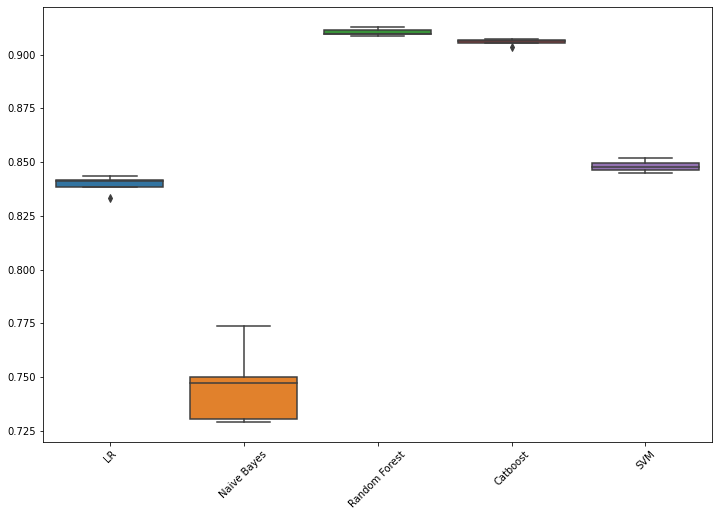

In [51]:
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(data=scores_boxplot['test_f1_score'])
plt.xticks(rotation=45)
plt.savefig('models_f1.png')

# Final Result

In [ ]:
RF = RandomForestClassifier(n_estimators=500,max_depth=50)
RF.fit(df_resampled[input_cols],df_resampled[output_col])
y_pred = np.array(RF.predict(X_teste[input_cols]),dtype=np.int16)

In [ ]:
result = pd.DataFrame({'id_solicitante':list(X_teste.index + 1),'inadimplente':y_pred})
result.to_csv('prediction1.csv',index=False)